In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
mri_data = pd.read_csv('/content/drive/My Drive/data/synthetic_mri_features.csv')
speech_data = pd.read_csv('/content/drive/My Drive/data/SF.csv')




In [ ]:
mri_data = mri_data.dropna()
speech_data = speech_data.dropna()

In [ ]:
merged_data = pd.merge(mri_data, speech_data, on='Stage class')

In [ ]:
merged_data = merged_data.dropna()

In [ ]:
features = merged_data.drop(columns=['Stage class'])
labels = merged_data['Stage class']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(normalized_features, labels, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)

In [ ]:

from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(RandomForestClassifier(n_estimators=100))
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Train the model with selected features
model.fit(X_train_selected, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test_selected)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    427878
         1.0       1.00      0.68      0.81     15273
         2.0       0.91      1.00      0.95     75360
         3.0       0.98      0.92      0.95     38710

    accuracy                           0.99    557221
   macro avg       0.97      0.90      0.93    557221
weighted avg       0.99      0.99      0.99    557221



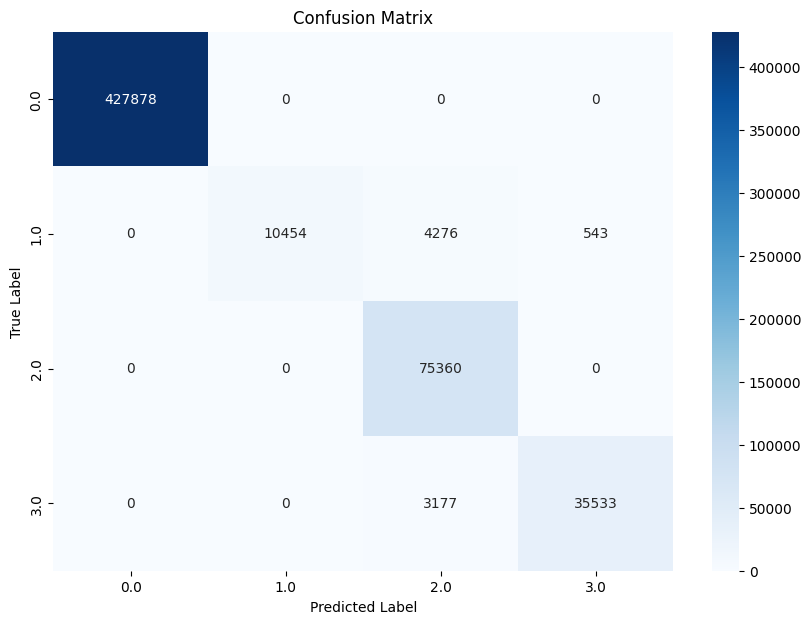

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Print classification report
print(classification_report(y_test, predictions))

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

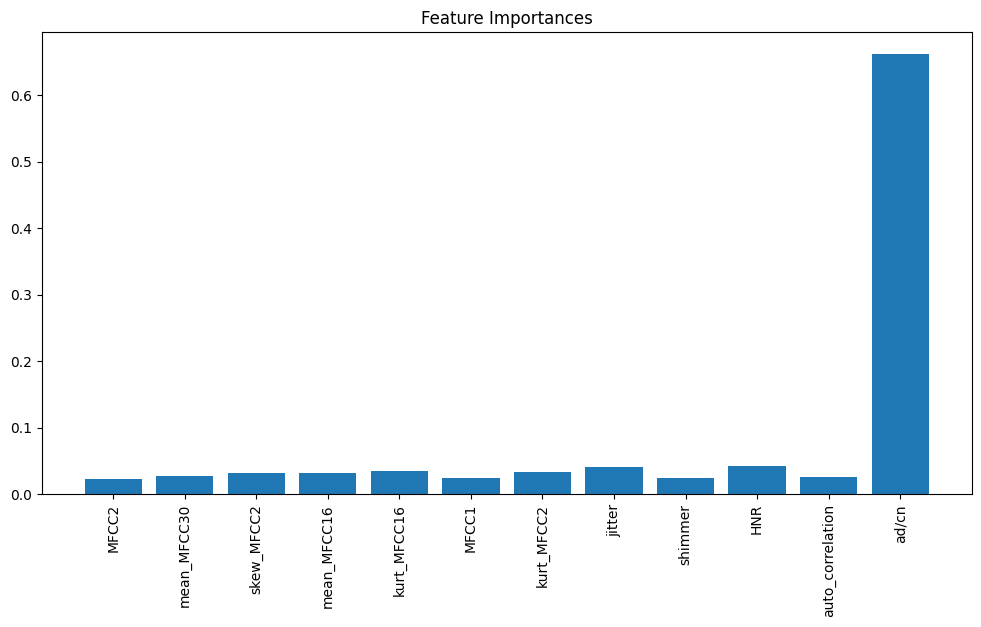

In [ ]:
# Get feature importances
importances = model.feature_importances_

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances, align='center')
plt.xticks(range(len(importances)), features.columns[selector.get_support()], rotation=90)
plt.xlim([-1, len(importances)])
plt.show()

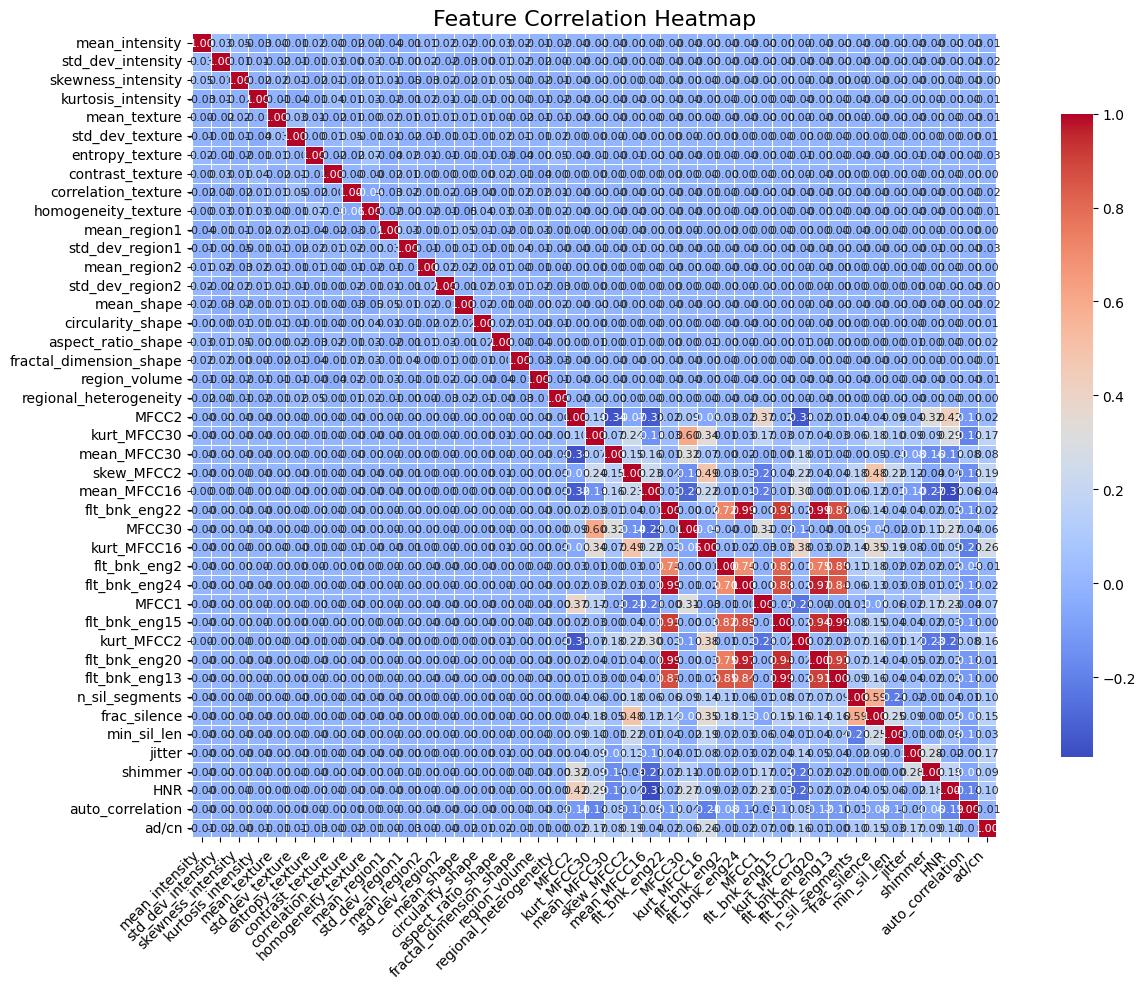

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming `features` is your DataFrame with features
correlation_matrix = features.corr()

plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(correlation_matrix,
                       annot=True,
                       fmt=".2f",
                       cmap='coolwarm',
                       square=True,
                       cbar_kws={"shrink": .8},  # Adjust color bar size
                       annot_kws={"size": 8},     # Adjust annotation font size
                       linewidths=0.5)            # Add lines between cells

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title('Feature Correlation Heatmap', fontsize=16)
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()